In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline,make_pipeline

In [2]:
df=pd.read_csv('Market_segmentation pr-2.csv')

In [3]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [4]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

<AxesSubplot:>

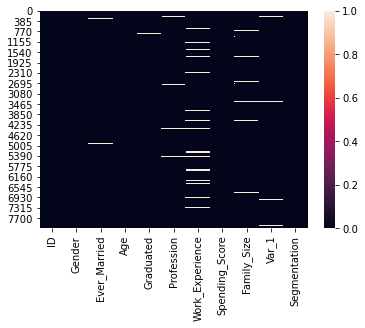

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

# Exploratory Data Analysis
Univarient Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [8]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

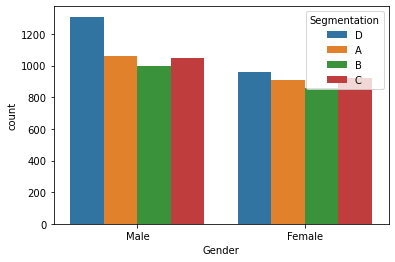

In [9]:
#Gender
sns.countplot(df['Gender'],hue=df['Segmentation'])

Segmentation D has slightly higher Male %, while there is no other significant difference

<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

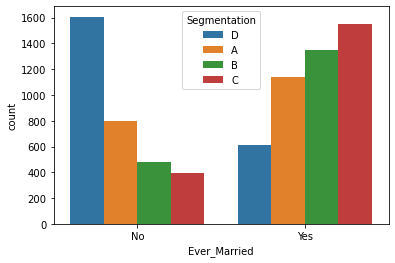

In [10]:
#Ever_Married
sns.countplot(df['Ever_Married'],hue=df['Segmentation'])

A,B,C have higher Married people vs D has more Single people

In [11]:
sum(df['Ever_Married'].isnull())

140

<AxesSubplot:xlabel='Age', ylabel='Density'>

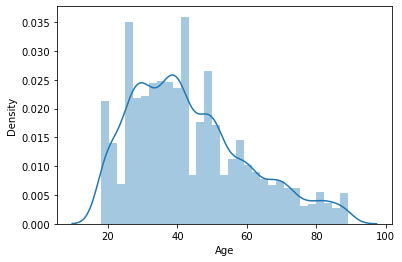

In [12]:
#Age
sns.distplot(df['Age'])

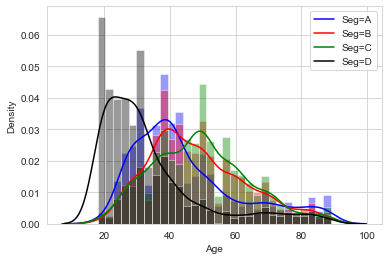

In [13]:
sns.set_style('whitegrid')
sns.distplot(df[df['Segmentation']=='A']['Age'],bins=30,color='blue')
sns.distplot(df[df['Segmentation']=='B']['Age'],bins=30,color='red')
sns.distplot(df[df['Segmentation']=='C']['Age'],bins=30,color='green')
sns.distplot(df[df['Segmentation']=='D']['Age'],bins=30,color='black')
plt.legend(labels=['Seg=A', 'Seg=B', 'Seg=C','Seg=D'])

<AxesSubplot:xlabel='Graduated', ylabel='count'>

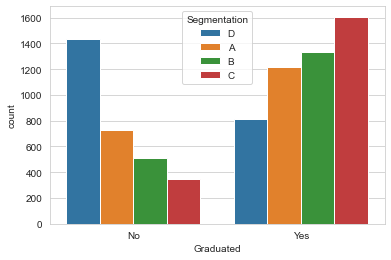

In [14]:
#Graduated
sns.countplot(df['Graduated'],hue=df['Segmentation'])

Graduated people are in Seg A,B,C while D has lesser graduates

<AxesSubplot:xlabel='Profession', ylabel='count'>

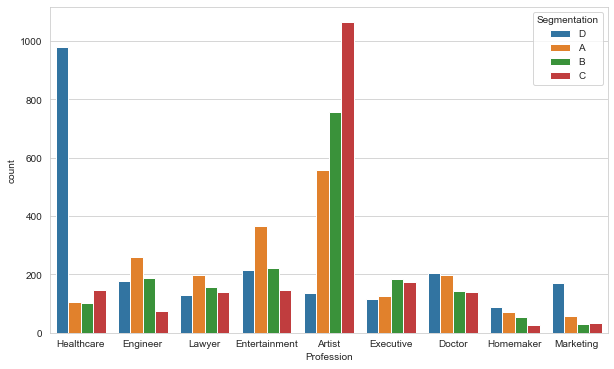

In [15]:
#Profession
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(df['Profession'],hue=df['Segmentation'])

<AxesSubplot:xlabel='Work_Experience', ylabel='count'>

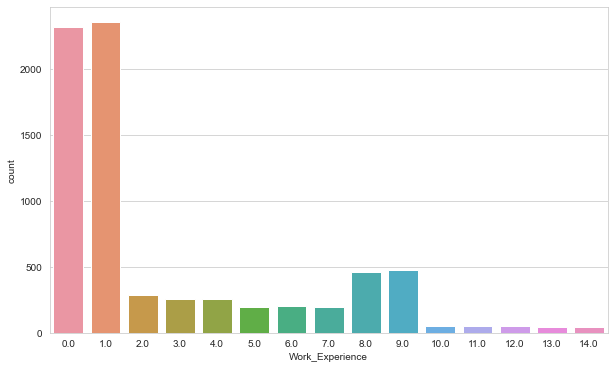

In [16]:
#Work_Experience
sns.countplot(df['Work_Experience'])

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

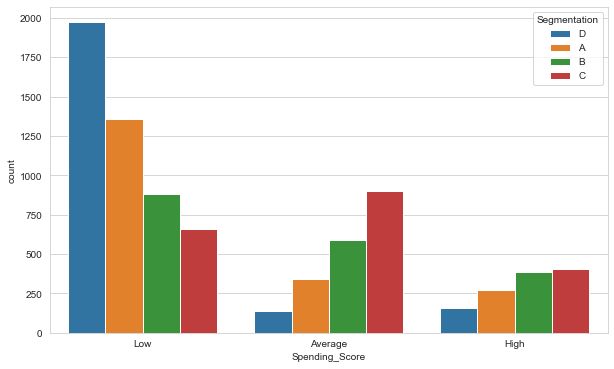

In [17]:
#Spending_Score
sns.countplot(df['Spending_Score'],hue=df['Segmentation'])

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

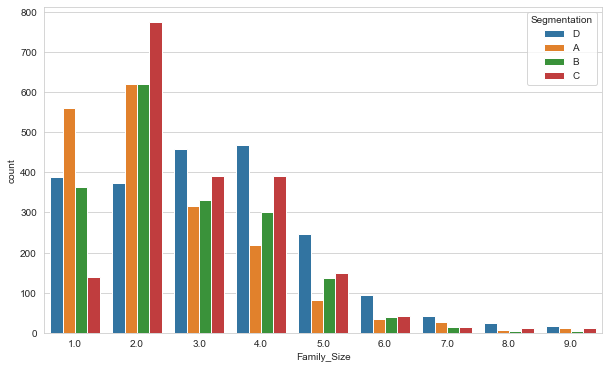

In [18]:
#Family_Size
sns.countplot(df['Family_Size'],hue=df['Segmentation'])

<AxesSubplot:xlabel='Var_1', ylabel='count'>

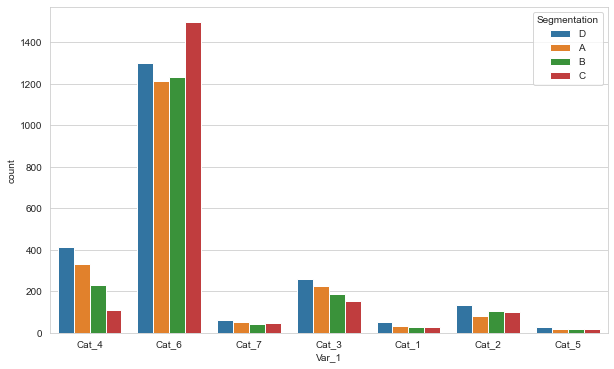

In [19]:
#Var_1
sns.countplot(df['Var_1'],hue=df['Segmentation'])

# Bivariate Analysis

In [20]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

<AxesSubplot:>

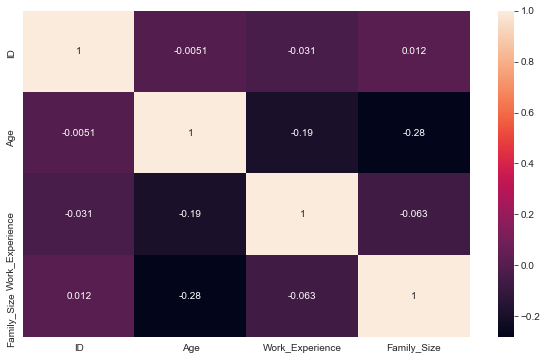

In [21]:
sns.heatmap(df.corr(),annot=True)

### Feature Engineering & Missing Value Treatment# 

<AxesSubplot:>

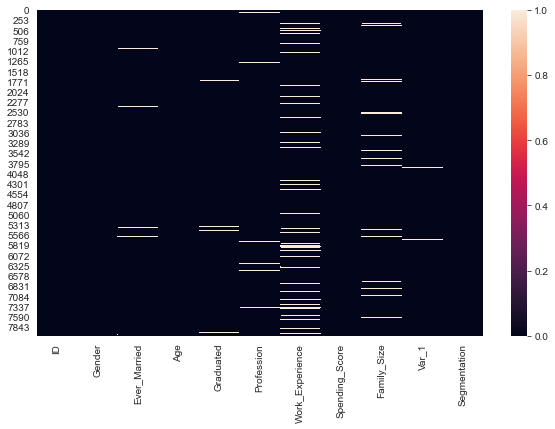

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [24]:
df[['Ever_Married','Graduated','Profession','Work_Experience','Family_Size','Var_1']]

,Ever_Married,Graduated,Profession,Work_Experience,Family_Size,Var_1
0,No,No,Healthcare,1.0,4.0,Cat_4
1,Yes,Yes,Engineer,NaN,3.0,Cat_4
2,Yes,Yes,Engineer,1.0,1.0,Cat_6
3,Yes,Yes,Lawyer,0.0,2.0,Cat_6
4,Yes,Yes,Entertainment,NaN,6.0,Cat_6
...,...,...,...,...,...,...
8063,No,No,NaN,0.0,7.0,Cat_1
8064,No,No,Executive,3.0,4.0,Cat_4
8065,No,Yes,Healthcare,1.0,1.0,Cat_6
8066,No,Yes,Healthcare,1.0,4.0,Cat_6


### Dealing with Ever_Married

<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

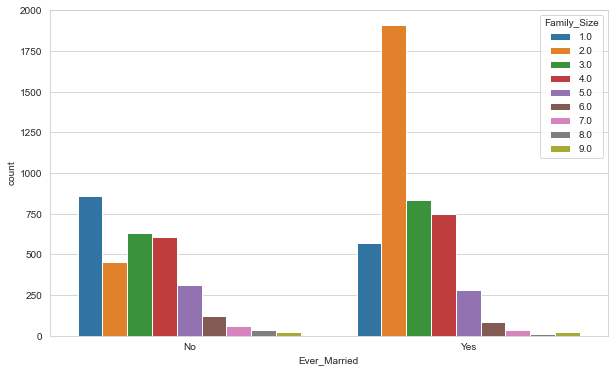

In [25]:

sns.countplot(df['Ever_Married'],hue=df['Family_Size'])

In [26]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

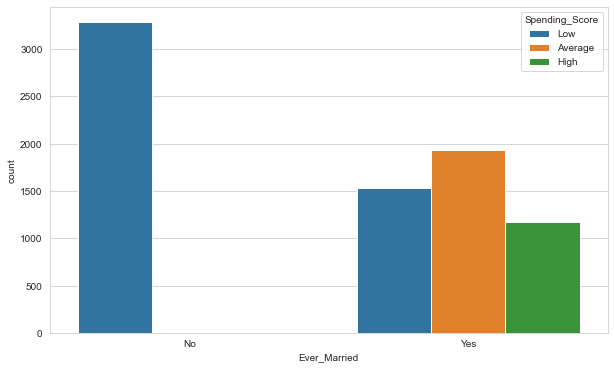

In [27]:
sns.countplot(df['Ever_Married'],hue=df['Spending_Score'])

Here we can see Married status is "yes" in average and high spending_score and "No" in low spending score, so we can fill the missing value according to above stat..

In [28]:
 mode_Ever_Married=df.pivot_table(values='Ever_Married',columns='Spending_Score',aggfunc=(lambda x: x.mode()[0]))

In [29]:
mode_Ever_Married

Spending_Score,Average,High,Low
Ever_Married,Yes,Yes,No


In [30]:
def impuet_Ever_Married(cols):
    ever_married=cols[0]
    spending_score=cols[1]
    if pd.isnull(ever_married):
        if spending_score=='Average':
            return 'Yes'
        elif spending_score=='High':
            return 'Yes'
        elif spending_score=='Low':
            return 'No'
    else:
        return ever_married

In [31]:
df['Ever_Married']=df[['Ever_Married','Spending_Score']].apply(impuet_Ever_Married,axis=1)

In [32]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

## Dealing with Graduated

<AxesSubplot:xlabel='Graduated', ylabel='count'>

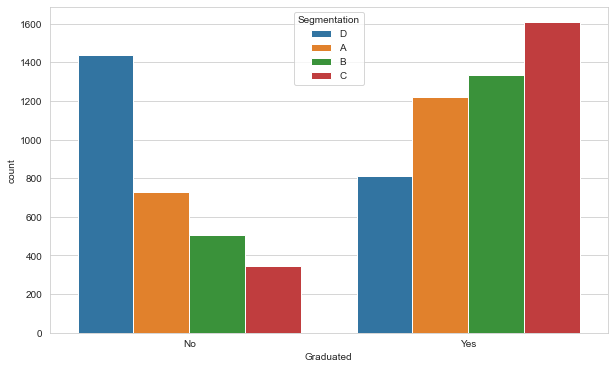

In [33]:
sns.countplot(df['Graduated'],hue=df['Segmentation'])

In [34]:
mode_Graduated=df.pivot_table(values='Graduated',columns='Segmentation',aggfunc=(lambda x: x.mode()[0]))

In [35]:
mode_Graduated

Segmentation,A,B,C,D
Graduated,Yes,Yes,Yes,No


In [36]:
def impuet_Graduated(cols):
    Graduated=cols[0]
    Segmentation=cols[1]
    if pd.isnull(Graduated):
        if Segmentation=='A':
            return 'Yes'
        elif Segmentation=='B':
            return 'Yes'
        elif Segmentation=='C':
            return 'Yes'
        elif Segmentation=='D':
            return 'No'
    else:
        return Graduated

In [37]:
df['Graduated']=df[['Graduated','Segmentation']].apply(impuet_Graduated,axis=1)

In [38]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [39]:
trf1=ColumnTransformer([
    ('impute_Profession_Var_1',SimpleImputer(strategy='most_frequent'),[5,9]),
    ('impute_Work_experience_Family_size',SimpleImputer(strategy='mean'),[6,8])
],remainder='passthrough')

In [40]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


## Encoding Data

In [41]:
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [42]:
trf2=ColumnTransformer([
    ('ohe_Gender_Ever_Married_Graduated_Profession_Var_1',
     OneHotEncoder(sparse=False,handle_unknown='ignore'),[2,4,5,9]),
    ('oe_Spending_Score',OrdinalEncoder([['Low','Average','High']]),[7]),
    ('le_Segmentation',LabelEncoder(),[10])
],remainder='passthrough')

In [43]:

trf3=ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,24))
])

In [45]:
trf4=KMeans(n_clusters=4)

In [46]:
pipe=make_pipeline(trf1,trf2,trf3,trf4)

In [48]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_Profession_Var_1',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5, 9]),
                                                 ('impute_Work_experience_Family_size',
                                                  SimpleImputer(), [6, 8])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Gender_Ever_Married_Graduated_Profession_Var_1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2, 4, 5, 9]),
                                                 ('oe_Spending_Score',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Average',
                                                                              'High']]),
                                                  [7]),
                                                 ('le_Segmentation',
                                                  LabelEncoder(), [10])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 24, None))])),
                ('kmeans', KMeans(n_clusters=4))])